INDIAN PREMIER LEAGUE(IPL) WIN Prediction using Machine Learning Methods(TEAM 10)

In [1]:
import pandas as pd

matches= pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")
players = pd.read_excel("Players.xlsx")
teams = pd.read_csv("teams.csv")
home_away = pd.read_csv("teamwise_home_and_away.csv")

In [2]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
# checking the shape of the datasets
print('Matches data shape -->',matches.shape)
print('Deliveries data shape -->',deliveries.shape)
print('Players data shape -->',players.shape)
print('Teams data shape -->',teams.shape)
print('Teamwise_home_and_away data shape -->',home_away.shape)

Matches data shape --> (756, 18)
Deliveries data shape --> (179078, 21)
Players data shape --> (566, 5)
Teams data shape --> (15, 1)
Teamwise_home_and_away data shape --> (14, 7)


Text(0.5, 1.0, 'Number of matches played in each IPL season')

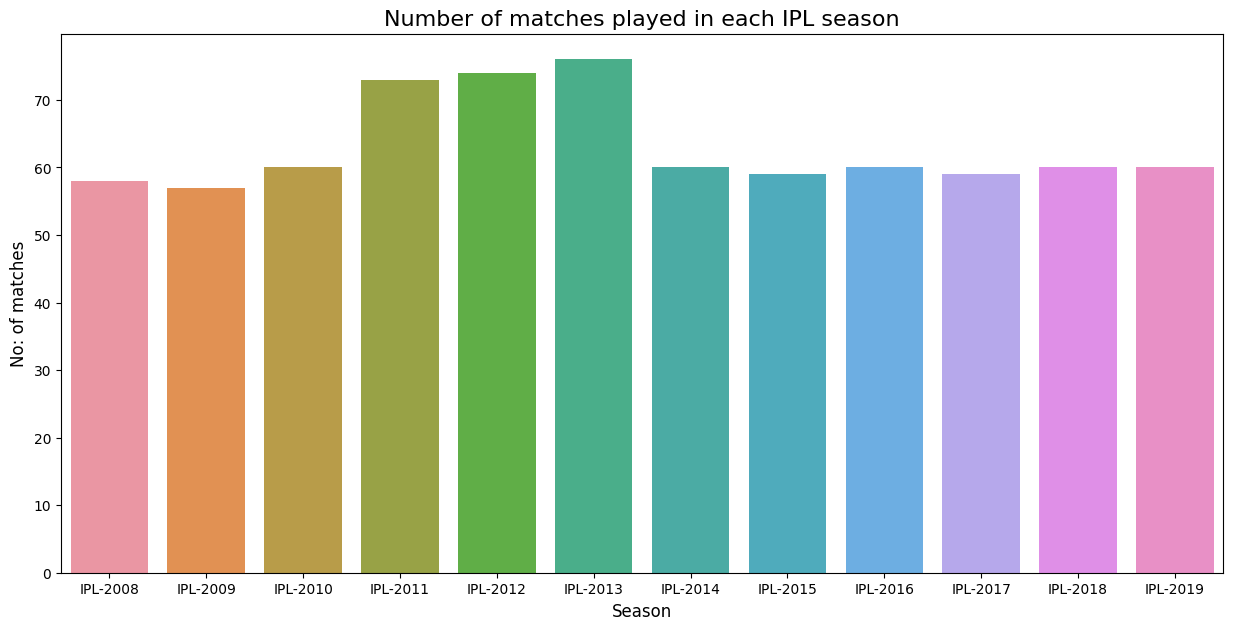

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7))
sns.countplot(x='Season',
              data=matches,
              order = matches['Season'].value_counts().index.sort_values()
              )
plt.xlabel('Season',fontsize=12)
plt.ylabel('No: of matches',fontsize=12)
plt.title('Number of matches played in each IPL season',fontsize=16)

In [5]:
#for Delhi Capitals
matches['team1']=matches['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
matches['team2']=matches['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
matches['winner']=matches['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
#for sunrisers Hyderabad
matches['team1']=matches['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches['team2']=matches['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches['winner']=matches['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

Text(0.5, 1.0, 'Matches won by the Teams')

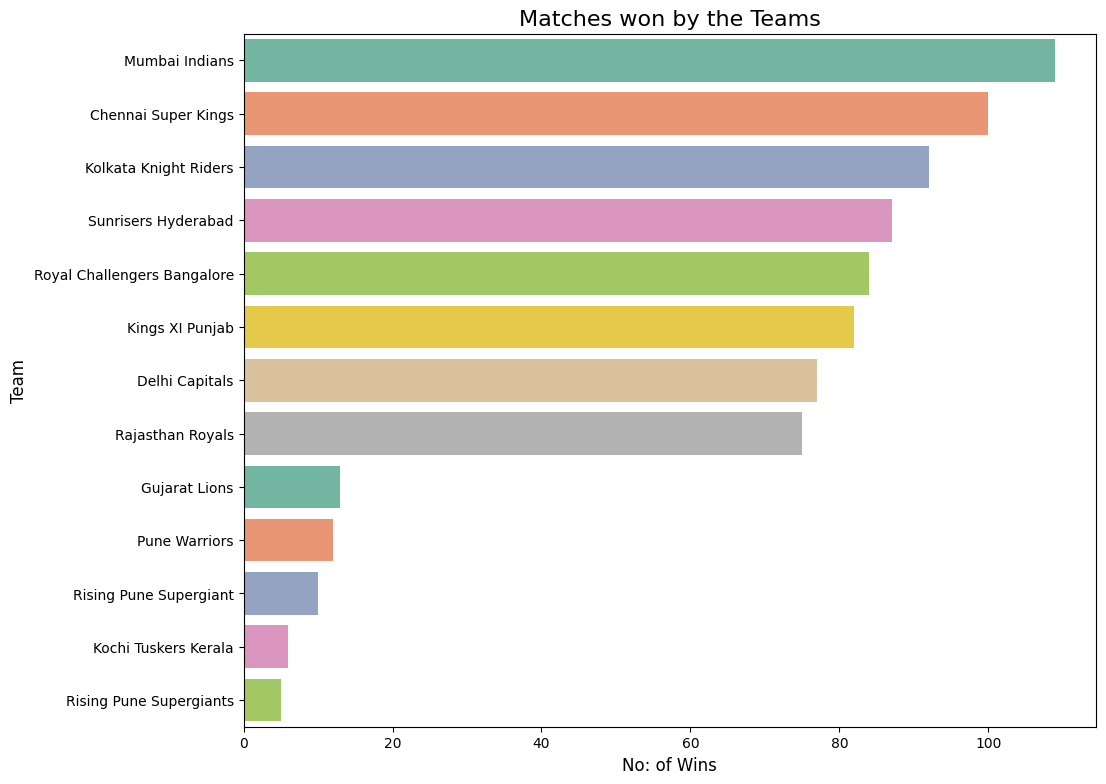

In [6]:
plt.figure(figsize=(11, 9))
sns.countplot(y='winner', data=matches, order=matches['winner'].value_counts().index, palette='Set2')
plt.xlabel('No: of Wins', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.title('Matches won by the Teams', fontsize=16)


<Axes: >

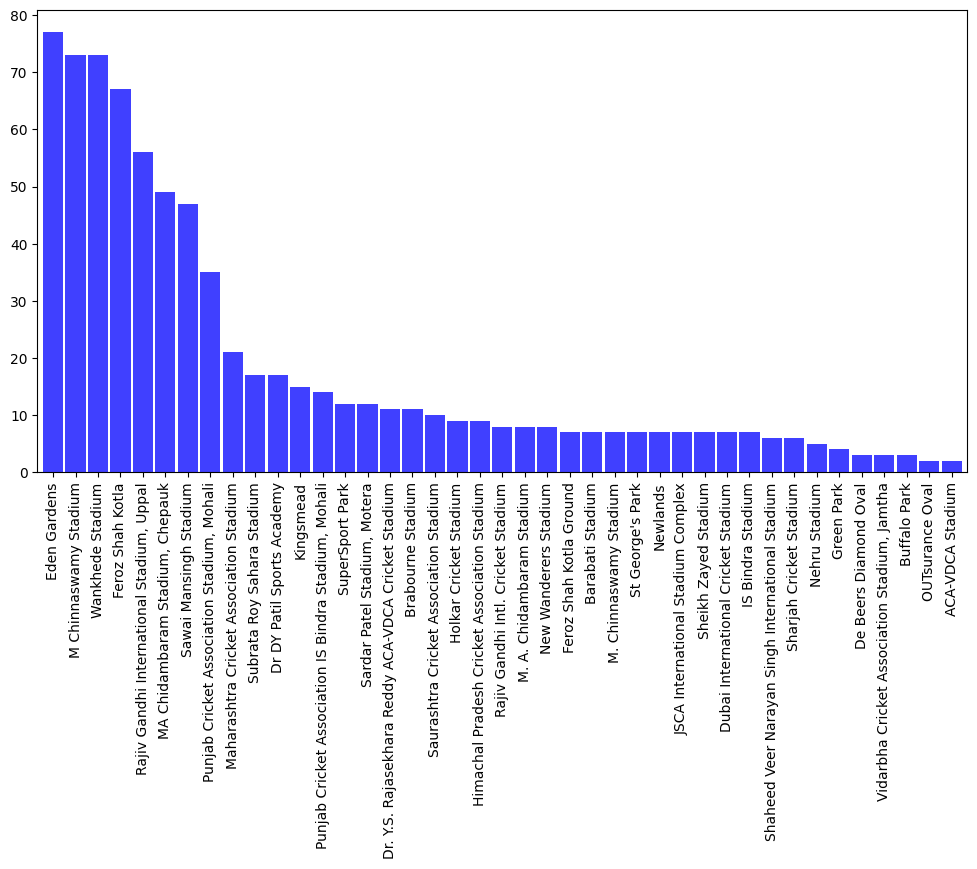

In [7]:
#stadiums with maximum matches
plt.subplots(figsize=(12,6))
matches['venue'].value_counts().plot.bar(width=0.9,color="blue",alpha=0.75)


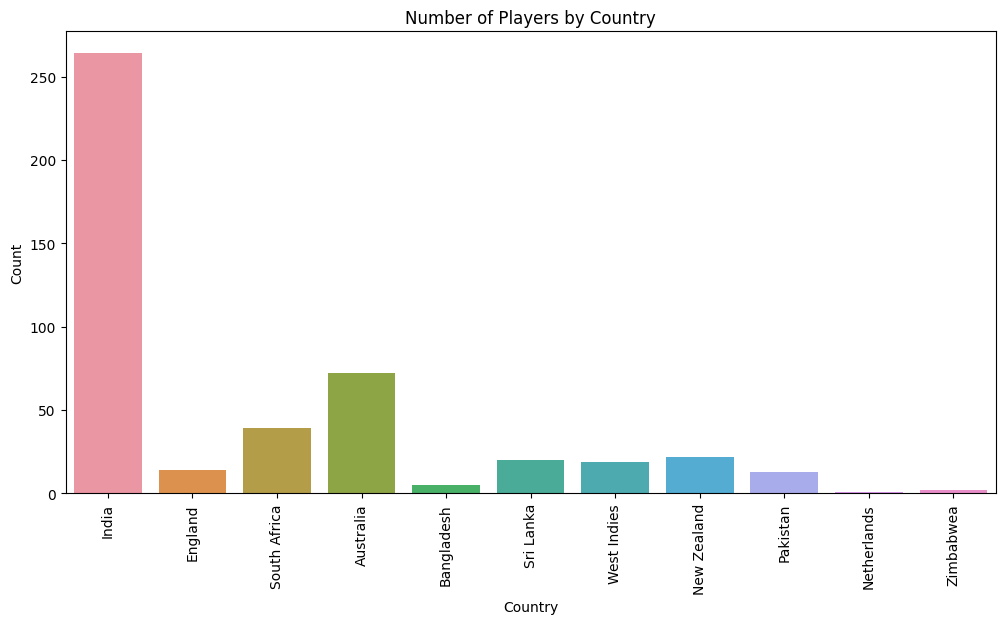

In [8]:
# number of players by country
plt.figure(figsize=(12,6))
sns.countplot(x='Country', data=players)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Number of Players by Country')
plt.show()

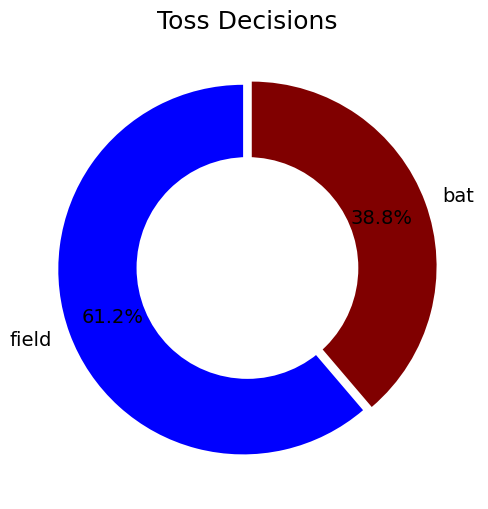

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))
sizes = matches.toss_decision.value_counts()
labels = matches.toss_decision.value_counts().index
wedges, texts, autotexts = ax.pie(sizes, colors=['blue','maroon'], labels=labels, autopct='%1.1f%%',
                                  startangle=90, pctdistance=0.75, explode=(0.025,0.025))
# set font sizes of labels and auto-labels
for text in texts + autotexts:
    text.set_fontsize(14)

#draw white circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
ax.add_artist(centre_circle)

ax.set_title('Toss Decisions', fontsize=18)
plt.show()


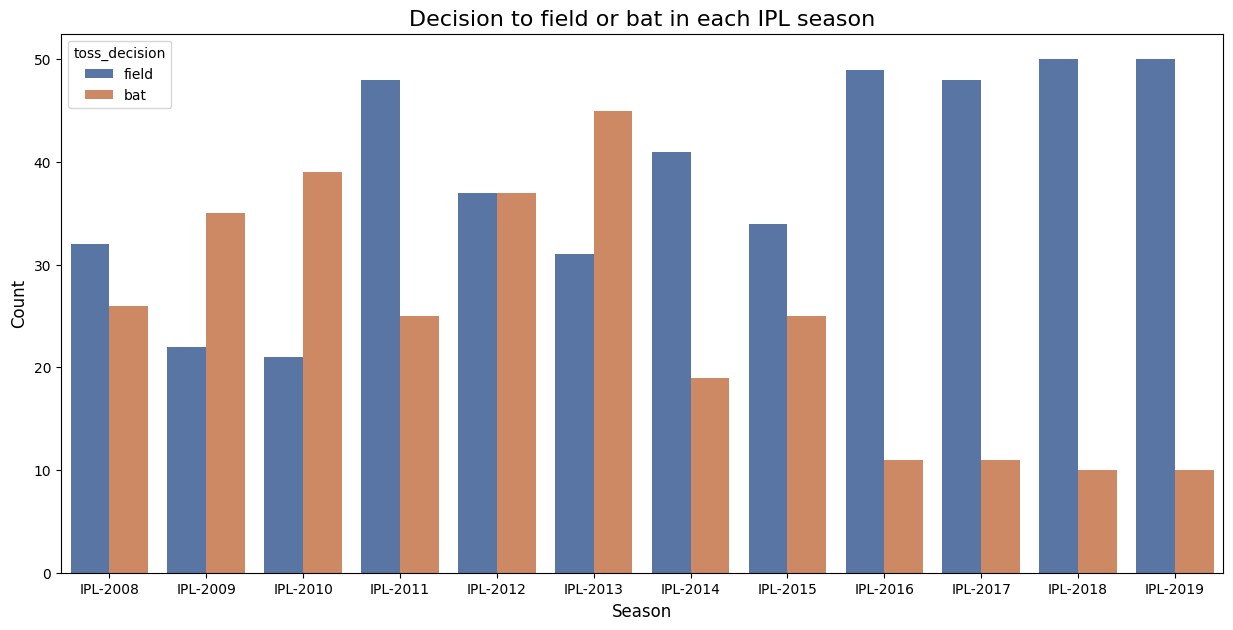

In [10]:
# Decision to field or bat in each IPL season
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='Season', hue='toss_decision', data=matches, order=matches['Season'].value_counts().index.sort_values(), palette='deep', ax=ax)

ax.set_xlabel('Season', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Decision to field or bat in each IPL season', fontsize=16)
plt.show()


In [11]:
home_away_new = pd.read_csv("teamwise_home_and_away.csv")
home_away_new

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


In [12]:
#dropping all the non active teams present
home_away_new.drop([0,11,12,13],axis="rows",inplace=True)

In [13]:
home_away_new

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632
10,Delhi Daredevils,25,42,72,89,34.722222,47.191011


In [14]:
# We have merged teams from delhi and hyderabad at their current franchise name & 
# calculated the average of win and loss percentage

home_away_new=home_away_new.append({"team":"Delhi Capitals","home_wins":"28","away_wins":"49","home_matches":"78","away_matches":"99",
                "home_win_percentage":"42.36111","away_win_percentage":"58.50000"},ignore_index=True)

home_away_new=home_away_new.append({"team":"Sunrisers Hyderabad","home_wins":"48","away_wins":"39","home_matches":"106","away_matches":"77",
                "home_win_percentage":"44.73","away_win_percentage":"48.29"},ignore_index=True)

home_away_new.drop([2,3,5,9],axis="rows",inplace=True)

<ipython-input-14-c4f3c6f1582a>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  home_away_new=home_away_new.append({"team":"Delhi Capitals","home_wins":"28","away_wins":"49","home_matches":"78","away_matches":"99",
<ipython-input-14-c4f3c6f1582a>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  home_away_new=home_away_new.append({"team":"Sunrisers Hyderabad","home_wins":"48","away_wins":"39","home_matches":"106","away_matches":"77",


In [15]:
home_away_new

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Mumbai Indians,58,51,101,86,57.425743,59.302326
1,Chennai Super Kings,51,49,89,75,57.303371,65.333333
4,Rajasthan Royals,29,46,67,80,43.283582,57.5
6,Kings XI Punjab,38,44,91,85,41.758242,51.764706
7,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
8,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632
10,Delhi Capitals,28,49,78,99,42.36111,58.50000
11,Sunrisers Hyderabad,48,39,106,77,44.73,48.29


Text(0, 0.5, 'WinPercentage')

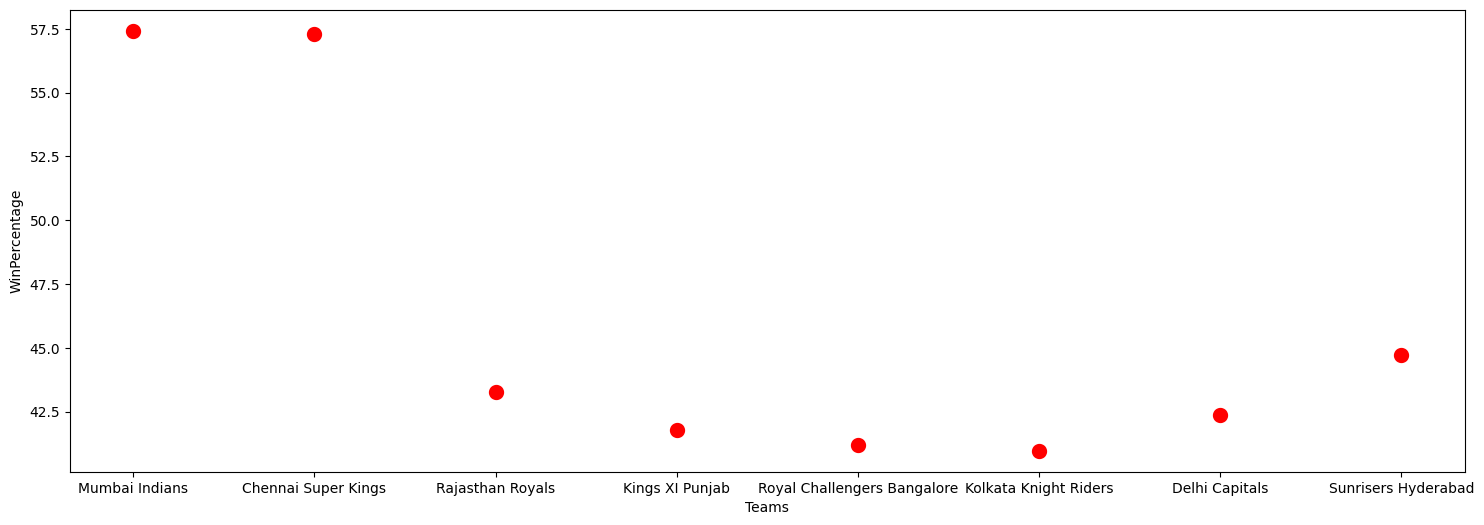

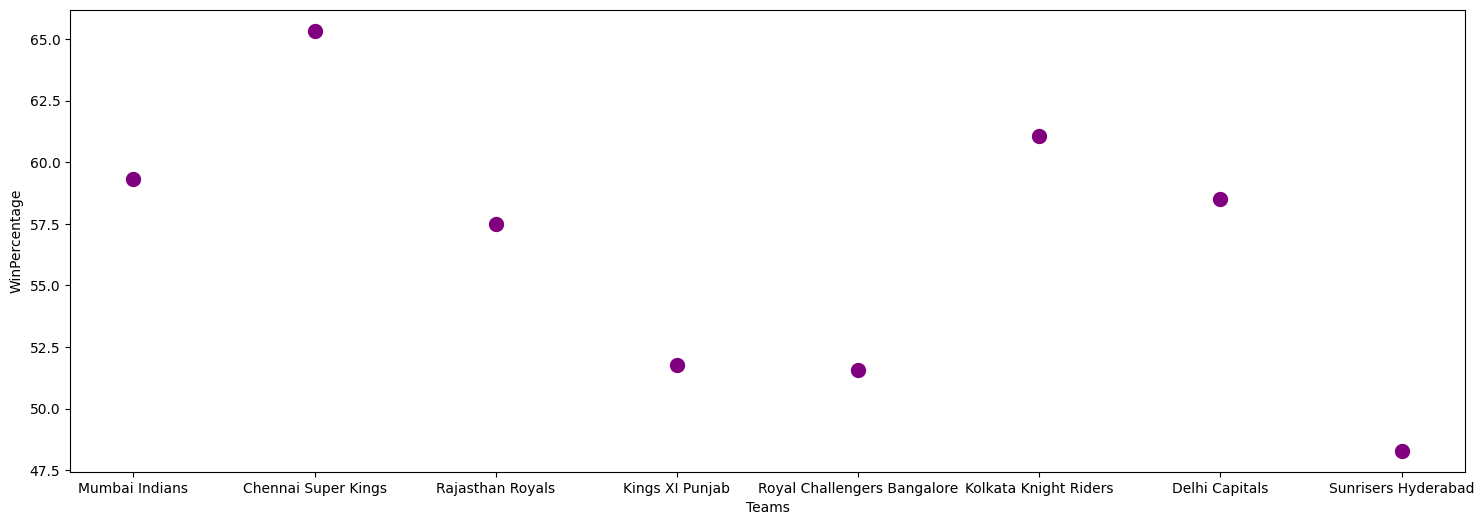

In [16]:
#  The below graph showing home win percentage of individual team

# plot showing home win percentage
plt.subplots(figsize=(18,6))
plt.scatter(home_away_new["team"],home_away_new["home_win_percentage"],linewidths=5,color="red")
plt.xlabel("Teams")
plt.ylabel("WinPercentage")

# plot showing away win percentage
plt.subplots(figsize=(18,6))
plt.scatter(home_away_new["team"],home_away_new["away_win_percentage"],linewidths=5,color="purple")
plt.xlabel("Teams")
plt.ylabel("WinPercentage")

<Figure size 1500x700 with 0 Axes>

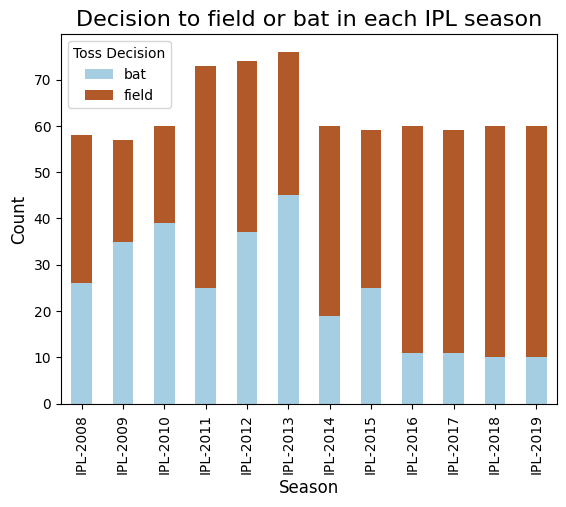

In [17]:
# Toss Decision to field or bat in each IPL season
plt.figure(figsize=(15, 7))

# To create a pivot table to count the number of toss decisions in each season
pivot_table = matches.pivot_table(index='Season', columns='toss_decision', values='id', aggfunc='count', fill_value=0)

# To create a stacked bar chart
pivot_table.plot(kind='bar', stacked=True, cmap='Paired')

plt.xlabel('Season', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Decision to field or bat in each IPL season', fontsize=16)
plt.legend(title='Toss Decision', loc='upper left')

plt.show()


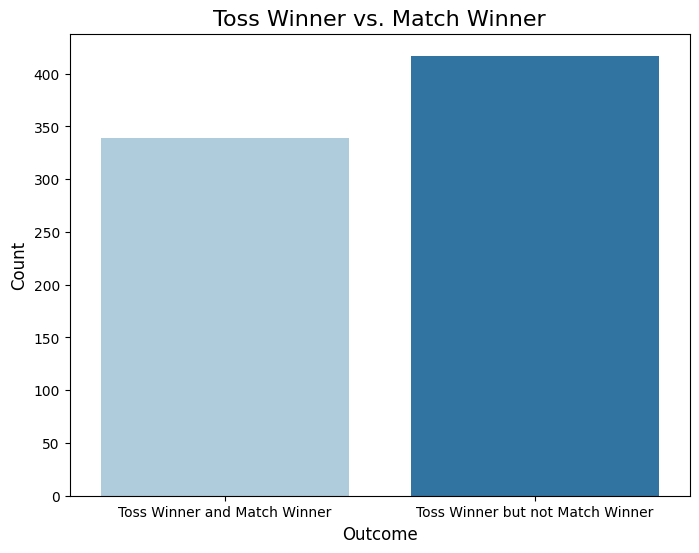

In [18]:
# cheching whether the Toss winner has higher chance of winning the game?
plt.figure(figsize=(8, 6))

# TO Count the number of times toss winner is also the match winner
toss_winner_match_winner = matches[matches['toss_winner'] == matches['winner']]
toss_winner_match_winner_count = len(toss_winner_match_winner)

# To Count the number of times toss winner is not the match winner
toss_winner_not_match_winner = matches[matches['toss_winner'] != matches['winner']]
toss_winner_not_match_winner_count = len(toss_winner_not_match_winner)

# To Create a stacked bar chart
sns.barplot(x=['Toss Winner and Match Winner', 'Toss Winner but not Match Winner'], 
            y=[toss_winner_match_winner_count, toss_winner_not_match_winner_count], 
            palette='Paired')
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Toss Winner vs. Match Winner', fontsize=16)
plt.show()

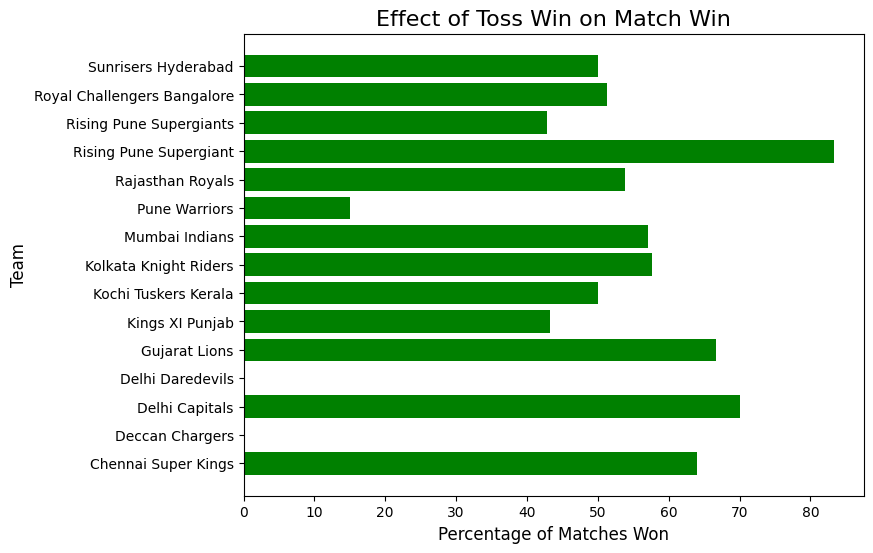

In [19]:
# To Calculate the percentage of matches won by each team when they win the toss
eff1 = matches[matches['toss_winner'] == matches['winner']]
eff1 = eff1.groupby('toss_winner')['winner'].count() / matches.groupby('toss_winner')['winner'].count() * 100

# To Create a horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(eff1.index, eff1, color='green')
plt.xlabel('Percentage of Matches Won', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.title('Effect of Toss Win on Match Win', fontsize=16)
plt.show()


In [20]:
seasons = matches['Season'].unique()

finals = pd.DataFrame()

for season in seasons:
    df = matches[matches['Season'] == season]
    final_match_id = df['id'].max()
    final = df[df['id'] == final_match_id]
    finals = pd.concat([finals, final])
seasons

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [21]:
finals

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
58,59,IPL-2017,Hyderabad,21-05-2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN
116,117,IPL-2008,Mumbai,01-06-2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
173,174,IPL-2009,Johannesburg,24-05-2009,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN
233,234,IPL-2010,Mumbai,25-04-2010,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN
306,307,IPL-2011,Chennai,28-05-2011,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN
380,381,IPL-2012,Chennai,27-05-2012,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel,NaN
456,457,IPL-2013,Kolkata,26-05-2013,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel,NaN
516,517,IPL-2014,Bangalore,01-06-2014,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
575,576,IPL-2015,Kolkata,24-05-2015,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens,HDPK Dharmasena,RK Illingworth,NaN
635,636,IPL-2016,Bangalore,29-05-2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [22]:
# Do Toss is a deciding Factor in Finals?
(sum(finals['toss_winner']==finals['winner'])/len(finals))*100

75.0

This percentage is a measure of whether winning the toss is a deciding factor in the finals of IPL. If the percentage is high, it means that the team that wins the toss has a higher chance of winning the match, and if the percentage is low, it means that the toss does not have a significant impact on the outcome of the match.








In [23]:
# All teams performances in all seasons
Per = matches.groupby(['winner', 'Season']).size().reset_index(name='wins')
Per = Per.pivot(index='winner', columns='Season', values='wins').fillna(0)
print(Per)


Season                       IPL-2008  IPL-2009  IPL-2010  IPL-2011  IPL-2012  \
winner                                                                          
Chennai Super Kings               9.0       8.0       9.0      11.0      10.0   
Delhi Capitals                    7.0      10.0       7.0       4.0      11.0   
Gujarat Lions                     0.0       0.0       0.0       0.0       0.0   
Kings XI Punjab                  10.0       7.0       4.0       7.0       8.0   
Kochi Tuskers Kerala              0.0       0.0       0.0       6.0       0.0   
Kolkata Knight Riders             6.0       3.0       7.0       8.0      12.0   
Mumbai Indians                    7.0       5.0      11.0      10.0      10.0   
Pune Warriors                     0.0       0.0       0.0       4.0       4.0   
Rajasthan Royals                 13.0       6.0       6.0       6.0       7.0   
Rising Pune Supergiant            0.0       0.0       0.0       0.0       0.0   
Rising Pune Supergiants     

In [24]:
# Now we need to do some feature engineering to change the data in such a way we want.
total_score = deliveries.groupby(['match_id', 'inning']).agg({'total_runs': 'sum'}).reset_index()
total_score.head()


,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183


In [25]:
# We will fetch only first inning data because we need to predict a probability in a second inning.
total_score_first_inning = total_score.loc[total_score['inning'] == 1]
total_score_first_inning.head()


,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157


In [26]:
# As we successfully created our first feature, its time to merge the data to the matches dataframe.
matches = matches.merge(total_score_first_inning.query('inning==1')[['match_id','total_runs']], left_on='id', right_on='match_id')
matches.head()


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157


In [27]:
# only those matches where dl_applied == 0
matches_df = matches.loc[matches['dl_applied'] == 0]


In [28]:
# Extracting only necessary columns
matches = matches[['match_id','city','winner','total_runs']]
matches.head()

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
1,2,Pune,Rising Pune Supergiant,184
2,3,Rajkot,Kolkata Knight Riders,183
3,4,Indore,Kings XI Punjab,163
4,5,Bangalore,Royal Challengers Bangalore,157


In [29]:
# Merge deliveries and matches df for further processing
df_merged = pd.merge(matches,deliveries,on='match_id')
df_merged.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [30]:
# As we know we will predict a probablity when the second innings will start.
df_merged = df_merged.loc[df_merged['inning'] == 2]

In [31]:
# Now for runs left column we need to create another column called current score by aplying cumulative sum on second inning ball by ball total_run.
df_merged['current_score'] = df_merged.groupby('match_id').cumsum()['total_runs_y']

<ipython-input-31-3098b93c6d1c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_merged['current_score'] = df_merged.groupby('match_id').cumsum()['total_runs_y']


In [32]:
df_merged['runs_left'] = df_merged['total_runs_x'] - df_merged['current_score']

In [33]:
# Creating 'ball_left' feature 
ball_per_over = 6
df_merged['balls_left'] = 126 - (df_merged['over'] * ball_per_over + df_merged['ball'])

In [34]:
# creating 'wickets left' feature from 'player_dismissed' feature
df_merged['player_dismissed'].fillna(0, inplace = True)
# creating a lambda function like - 0 for nan values and 1 for player dismissed 
df_merged['player_dismissed'] = df_merged['player_dismissed'].apply(lambda x:x if x == 0 else 1)

wickets = df_merged.groupby('match_id').cumsum()['player_dismissed'].values
total_wickets = 10
df_merged['wickets_left'] = total_wickets - wickets
df_merged.head()

<ipython-input-34-93f33c96c956>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets = df_merged.groupby('match_id').cumsum()['player_dismissed'].values


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [35]:
# current run rate (crr = runs/overs)
total_balls = 120
df_merged['crr'] = (df_merged['current_score'] * ball_per_over) / (total_balls - df_merged['balls_left'])

In [36]:
# required run rate (rrr = (Runs required to win / Balls Remaining  ) x 6)
df_merged['rrr'] = (df_merged['runs_left']*6) / df_merged['balls_left']

In [37]:
# match result: 0-lose | 1-win
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

df_merged['result'] = df_merged.apply(result,axis=1)

In [38]:
# final df for model building
df = df_merged[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr','result']]

In [39]:
# just sample the data to remove any bias
df = df.sample(df.shape[0])

In [40]:
# drop null values from final df
df.dropna(inplace=True)

In [41]:
cities = df['city'].unique().tolist()
print(cities)

['Pune', 'Chandigarh', 'Jaipur', 'Delhi', 'Ranchi', 'Bangalore', 'Visakhapatnam', 'Sharjah', 'Nagpur', 'Chennai', 'Kolkata', 'Mumbai', 'Mohali', 'Centurion', 'Hyderabad', 'Rajkot', 'Cuttack', 'Dharamsala', 'Bengaluru', 'Port Elizabeth', 'Ahmedabad', 'Kimberley', 'Raipur', 'Durban', 'Johannesburg', 'Abu Dhabi', 'East London', 'Kanpur', 'Bloemfontein', 'Indore', 'Cape Town', 'Kochi']


In [42]:
# drop those rows where balls_left == 0 or negative value
df = df.loc[df['balls_left'] != 0]
df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
74277,Kings XI Punjab,Pune Warriors,Pune,67,30,5,166,6.600000,13.400000,0
144834,Delhi Daredevils,Kings XI Punjab,Chandigarh,122,78,10,181,8.428571,9.384615,0
61764,Rajasthan Royals,Kochi Tuskers Kerala,Jaipur,86,99,10,109,6.571429,5.212121,1
168611,Sunrisers Hyderabad,Delhi Capitals,Delhi,52,65,8,134,8.945455,4.800000,1
105578,Kolkata Knight Riders,Pune Warriors,Ranchi,74,48,7,170,8.000000,9.250000,0


Model Building

In [43]:
# Separate Dependent and Independent Variables
X = df.drop('result',axis=1)
y = df['result']

In [44]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

Logistic Regression 

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [47]:
y_pred = pipe.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8473421439060206

In [49]:
pipe.predict_proba(X_test)[25]

array([0.27982044, 0.72017956])


predicted probability of the input sample belonging to each class

Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier(n_estimators=100, random_state=50))
])

rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

accuracy_score(y_test,y_pred_rf)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.9995301027900146

XG BOOST

In [51]:
import xgboost as xgb

xgb_model = Pipeline(steps=[
    ('step1',trf),
    ('step2',xgb.XGBClassifier(random_state=50, eval_metric='logloss'))
])

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_score(y_test,y_pred_xgb)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.9960058737151248

Hyperparameter training

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# To define pipeline
pipe = Pipeline(steps=[
    ('trf',trf),
    ('logreg',LogisticRegression(solver='liblinear'))
])

In [53]:
# To define grid of hyperparameters to search over
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2']
}


In [54]:
# To perform grid search using 5-fold cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5)


In [55]:
# To fit grid search to training data
grid_search.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('trf',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['batting_team',
                                                                          'bowling_team',
                                                                          'city'])])),
                                       ('logreg',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'logreg__penalty': ['l1', 'l2']})

In [56]:
# To print best hyperparameters and corresponding score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'logreg__C': 10, 'logreg__penalty': 'l1'}
Best score: 0.85


logistic regression model with Lasso regularization (penalty='l1') and regularization parameter C=100 achieved the highest mean cross-validated score of 0.85.